In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train= pd.read_csv('train_preprocessed.csv') 
test= pd.read_csv('test_preprocessed.csv') 


# Preprocessing

# Machine Learning!!!

In [46]:
# remove identifiable columns:

train_cleaned.drop(columns=['patient_id'], inplace=True)

/var/folders/r5/y28l0wzs6jn0m6250hwc21s00000gn/T/ipykernel_43828/163734896.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [47]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV


from sklearn.metrics import roc_curve, auc
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.tree import DecisionTreeClassifier, plot_tree

In [48]:
# Define features X and target y

X = train_cleaned.drop(columns=['DiagPeriodL90D']) 
y = train_cleaned['DiagPeriodL90D']

In [49]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.1, random_state=0) #90% training

# include validation
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)


In [50]:
print(X_train.dtypes)

patient_zip3                                        int64
bmi                                               float64
population                                        float64
density                                           float64
male                                              float64
female                                            float64
family_dual_income                                float64
income_household_median                           float64
income_household_under_5                          float64
income_household_5_to_10                          float64
income_household_10_to_15                         float64
income_household_15_to_20                         float64
income_household_20_to_25                         float64
income_household_25_to_35                         float64
income_household_35_to_50                         float64
income_household_50_to_75                         float64
income_household_75_to_100                        float64
income_househo

Accuracy: 0.6329588014981273
Precision: 0.5667293233082706
Recall: 0.5010717304673349
F1 Score: 0.3924068268895855


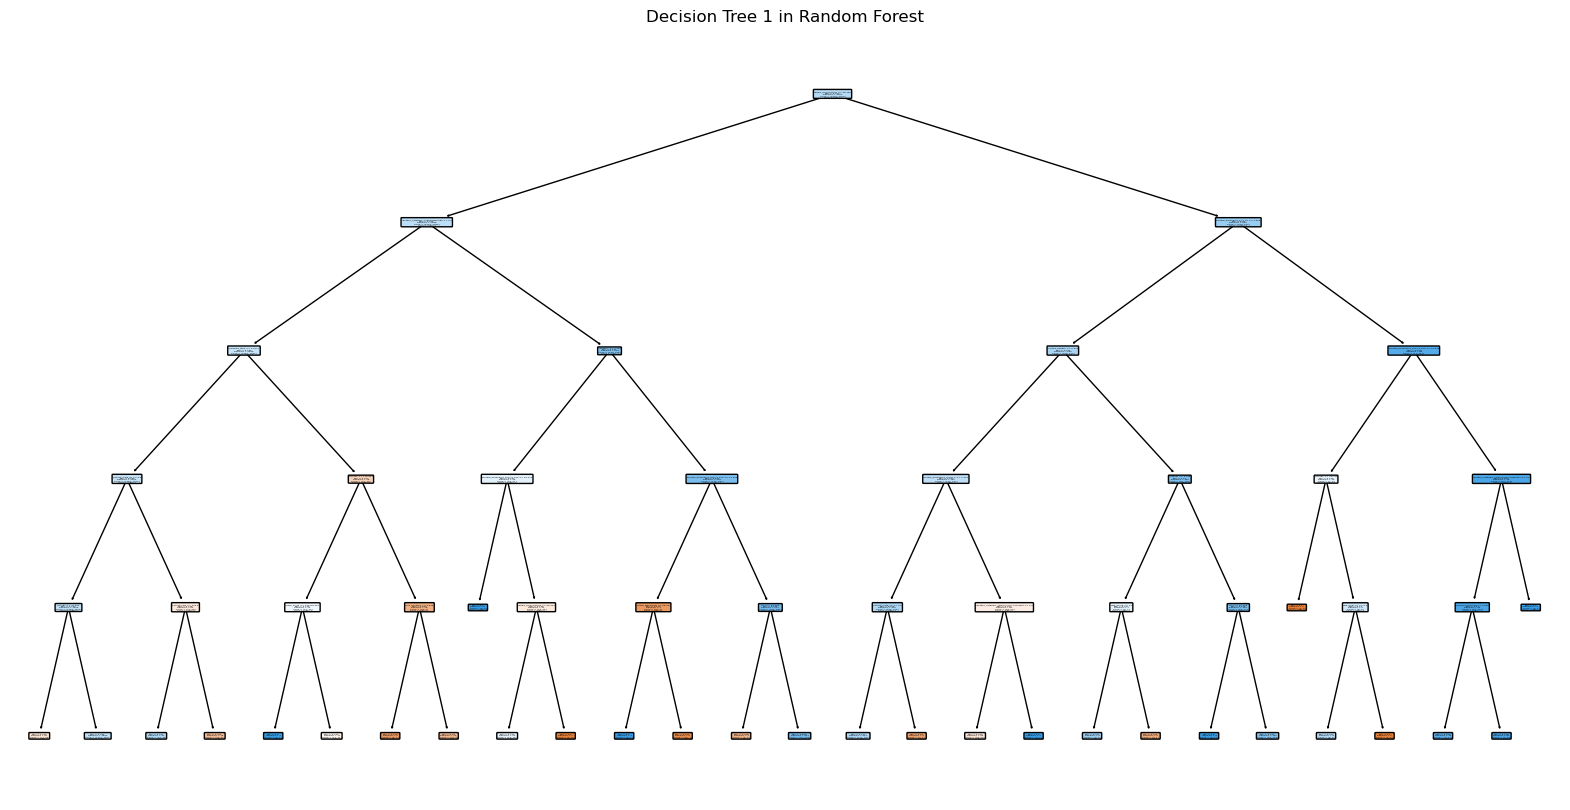

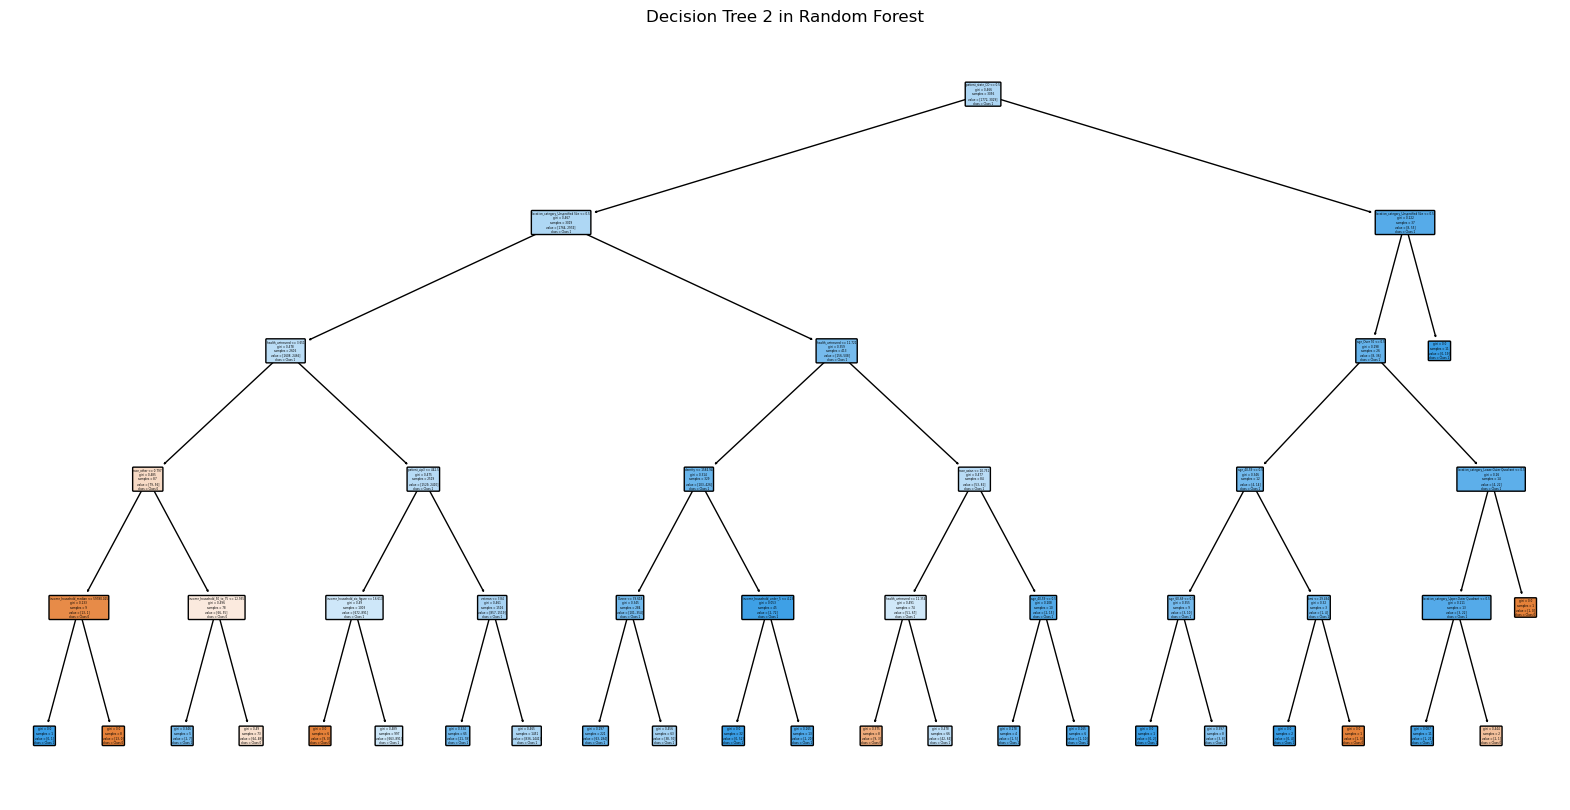

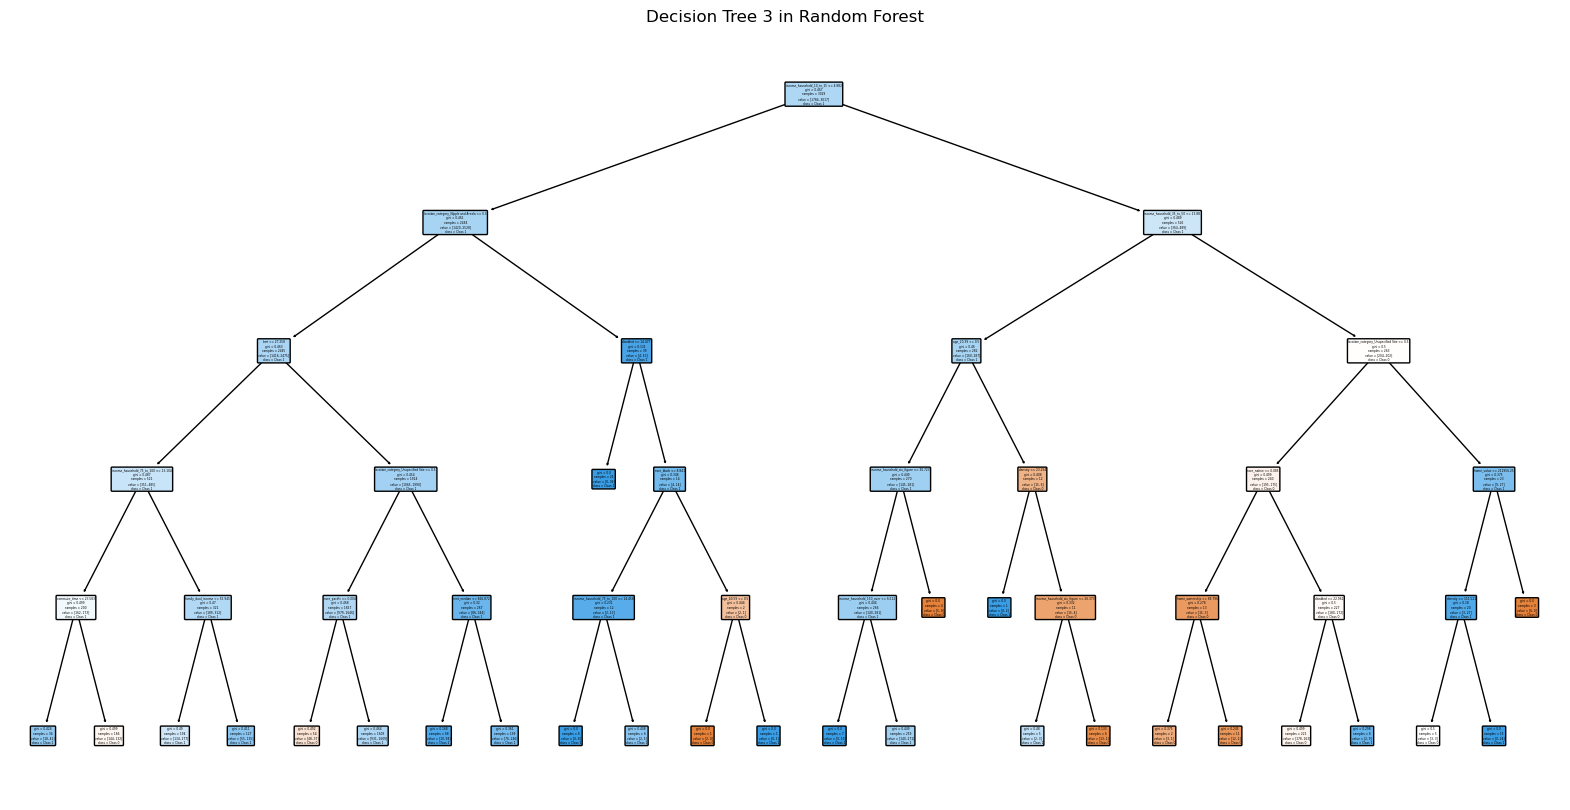

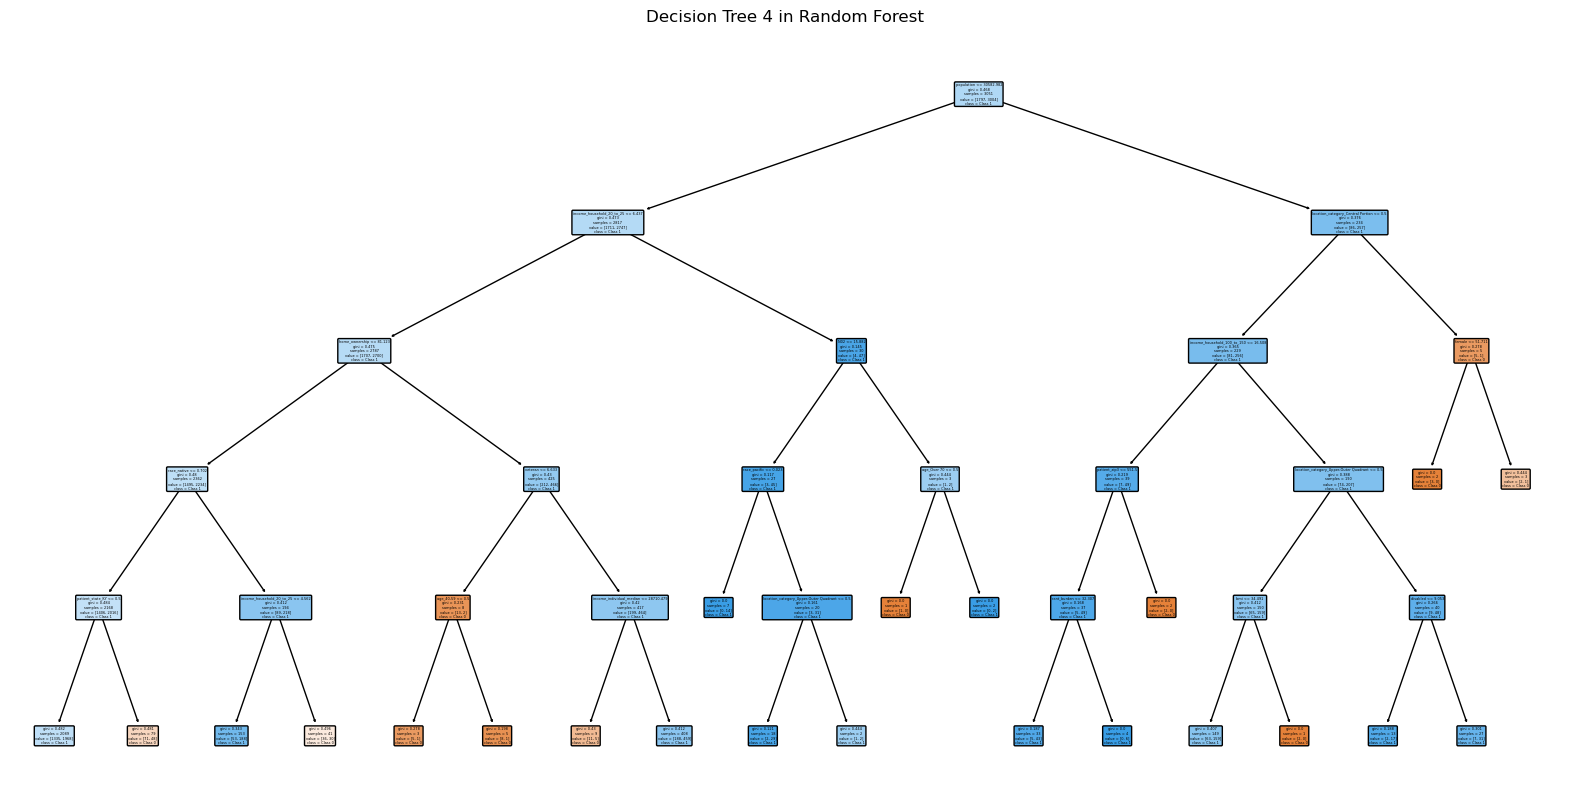

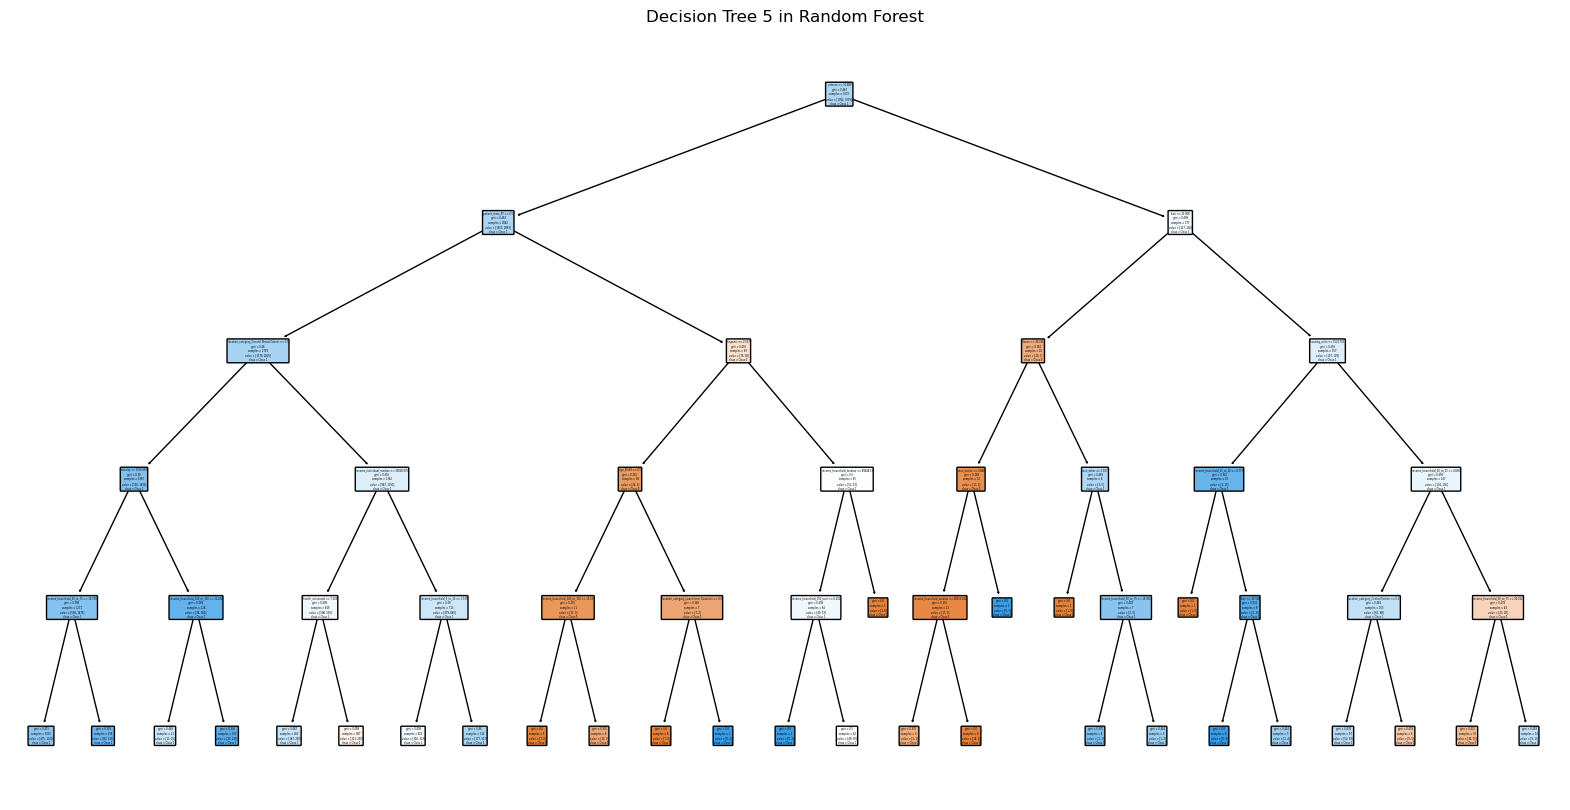

In [59]:
# Use the hyperparameters from GridSearchCV
rf = RandomForestClassifier(
    n_estimators=100, 
    max_depth=5,    
    random_state=42
)

rf.fit(X_train, y_train)

y_val_pred = rf.predict(X_val)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

rfaccuracy = accuracy_score(y_val, y_val_pred)
rfprecision = precision_score(y_val, y_val_pred, average='macro')
rfrecall = recall_score(y_val, y_val_pred, average='macro')
rff1 = f1_score(y_val, y_val_pred, average='macro')

print(f"Accuracy: {rfaccuracy}")
print(f"Precision: {rfprecision}")
print(f"Recall: {rfrecall}")
print(f"F1 Score: {rff1}")


for i in range(5):
    plt.figure(figsize=(20, 10))
    plot_tree(rf.estimators_[i], filled=True, feature_names=X.columns.tolist(), class_names=['Class 0', 'Class 1'], rounded=True)
    plt.title(f"Decision Tree {i+1} in Random Forest")
    plt.show()

In [60]:
# Gradient Boosting
from sklearn.metrics import classification_report

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

best_gb = grid_search.best_estimator_

y_val_pred = best_gb.predict(X_val)
y_test_pred = best_gb.predict(X_test)

print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Validation Accuracy: 0.6329588014981273
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       196
           1       0.63      1.00      0.78       338

    accuracy                           0.63       534
   macro avg       0.32      0.50      0.39       534
weighted avg       0.40      0.63      0.49       534

Test Accuracy: 0.651685393258427
Test Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        93
           1       0.65      1.00      0.79       174

    accuracy                           0.65       267
   macro avg       0.33      0.50      0.39       267
weighted avg       0.42      0.65      0.51       267



/Users/katyatkins/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/katyatkins/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/katyatkins/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/katyatkins/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being s

Fitting 3 folds for each of 90 candidates, totalling 270 fits
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2}
Accuracy: 0.5749063670411985
Precision: 0.5376210020909161
Recall: 0.536665257819104
F1 Score: 0.5368886749418331


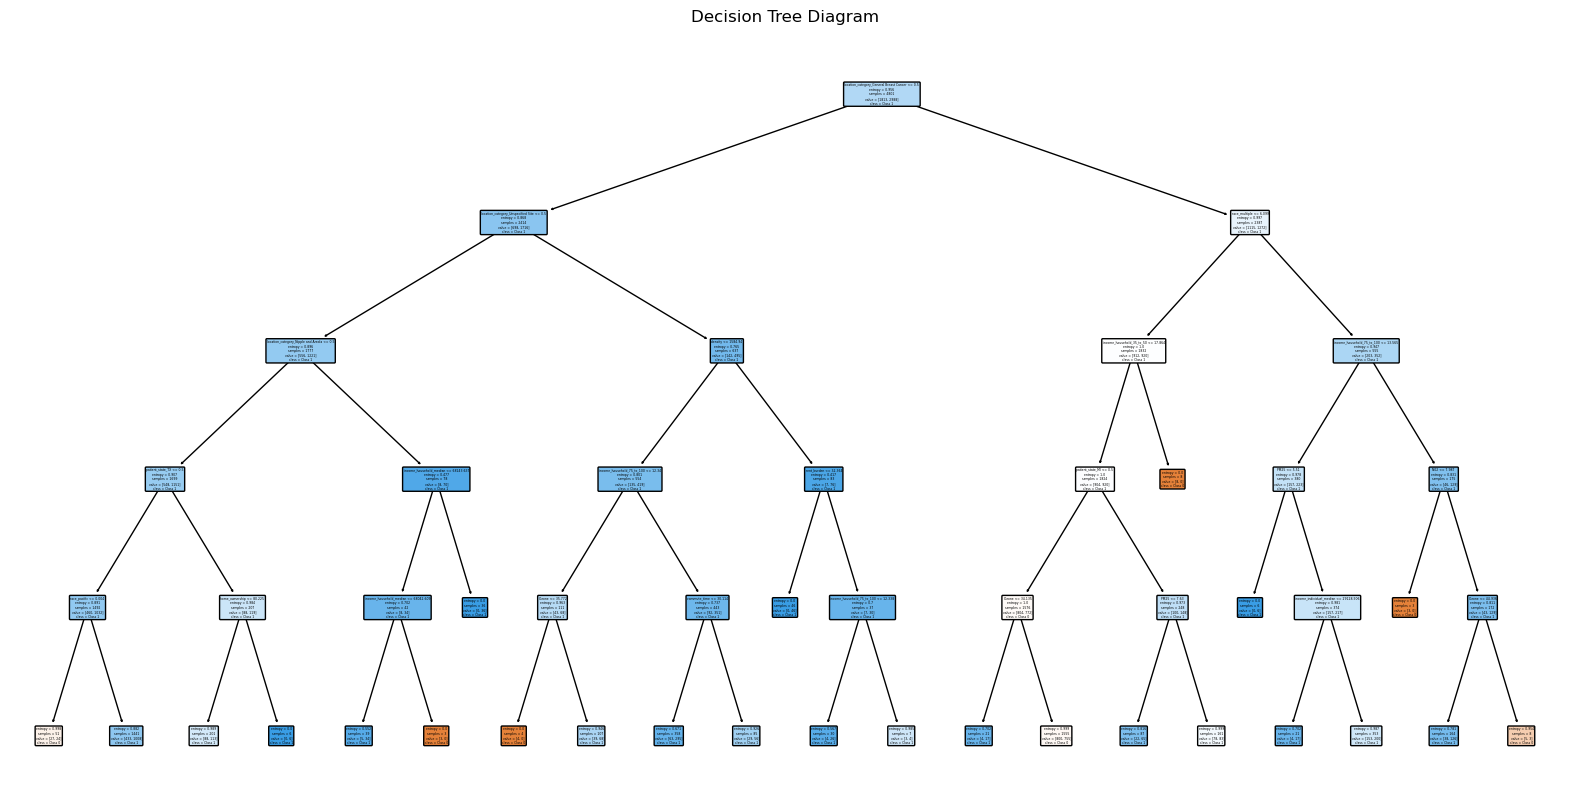

In [62]:
# decision tree

dt = DecisionTreeClassifier(random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

best_dt = grid_search.best_estimator_

y_val_pred = best_dt.predict(X_val)

dtaccuracy = accuracy_score(y_val, y_val_pred)
dtprecision = precision_score(y_val, y_val_pred, average='macro')
dtrecall = recall_score(y_val, y_val_pred, average='macro')
dtf1 = f1_score(y_val, y_val_pred, average='macro')

print(f"Accuracy: {dtaccuracy}")
print(f"Precision: {dtprecision}")
print(f"Recall: {dtrecall}")
print(f"F1 Score: {dtf1}")

plt.figure(figsize=(20, 10))
plot_tree(best_dt, filled=True, feature_names=X.columns.tolist(), class_names=['Class 0', 'Class 1'], rounded=True)
plt.title("Decision Tree Diagram")
plt.show()



Improving

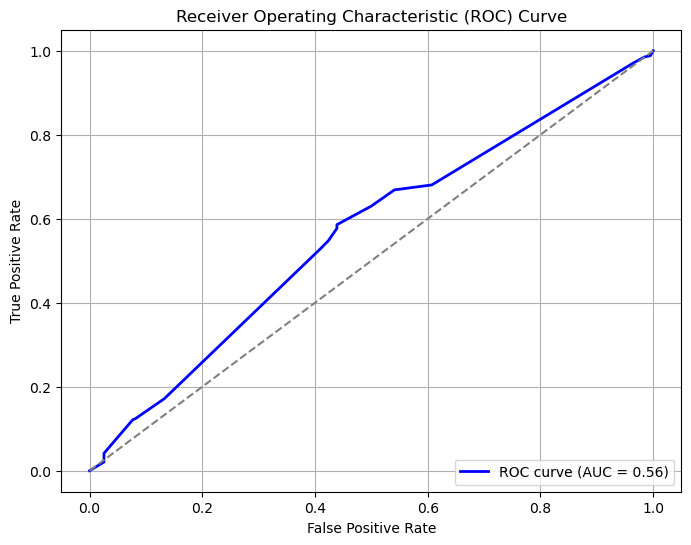

ROC-AUC Score: 0.56
Accuracy: 0.5749
Precision: 0.5376
Recall: 0.5367
F1 Score: 0.5369


In [61]:
# ROC and AUC for decision tree
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

dt = DecisionTreeClassifier(max_depth=5, criterion='entropy', random_state=42)

dt.fit(X_train, y_train)

y_pred_prob = dt.predict_proba(X_val)[:, 1]  

fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f'ROC-AUC Score: {roc_auc:.2f}')

y_pred = dt.predict(X_val)
rcaccuracy = accuracy_score(y_val, y_pred)
rcprecision = precision_score(y_val, y_pred, average='macro')
rcrecall = recall_score(y_val, y_pred, average='macro')
rcf1 = f1_score(y_val, y_pred, average='macro')

print(f"Accuracy: {rcaccuracy:.4f}")
print(f"Precision: {rcprecision:.4f}")
print(f"Recall: {rcrecall:.4f}")
print(f"F1 Score: {rcf1:.4f}")

In [63]:
model_performance = {
    'Model': ['Random Forest', 'Decision Tree', 'Gradient Boosting'],
    'Accuracy': [rfaccuracy, dtaccuracy, accuracy],
    'Precision': [rfprecision, dtprecision, precision],
    'Recall': [rfrecall, dtrecall, recall],
    'F1 Score': [rff1, dtf1, f1]
}

performance_df = pd.DataFrame(model_performance)

print(performance_df)

               Model  Accuracy  Precision    Recall  F1 Score
0      Random Forest  0.632959   0.566729  0.501072  0.392407
1      Decision Tree  0.574906   0.537621  0.536665  0.536889
2  Gradient Boosting  0.574906   0.537621  0.536665  0.536889
